In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
from nltk import bigrams
import itertools
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [2]:
# Read your CSV file
df = pd.read_csv('../data/phone_ratings_cleaned_final_2.csv')
df.head()

,product_id,comment,comment_clean,rating
0,honor-x8b,đừng mua không có linh kiện,đừng mua không_có linh_kiện,1
1,honor-x8b,máy sao cũng được ghét nhất cái zalo vui nó bá...,máy ghét_nhất zalo vui báo hiện gọi,3
2,honor-x8b,chiếc điện thoại mỏng nhất tôi từng dùng cũng ...,điện_thoại mỏng chip máy mượt,5
3,honor-x8b,sao hôm tôi mua lại không được tặng tai nghe n...,hôm mua không tặng tai_nghe giới_thiệu hôm đấy,4
4,honor-x8b,em mua được tuần trả lại mất bao nhiêu ạ,mua tuần trả bao_nhiêu,3


# 1. One Hot Encoding

In [3]:
comments = df['comment_clean'].astype(str).tolist()

In [4]:
comment_one_hot_encoding = comments

In [5]:

vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(comment_one_hot_encoding)

In [6]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
vectorizer.get_feature_names_out()

array(['10', '100', '1000', ..., 'ủng_hộ', 'ứng_dụng', 'ứng_dụng_cụ_thể'],
      dtype=object)

In [8]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comment_one_hot_encoding)
df

,10,100,1000,1015,1080x2400,11,11040,11490,12,120,...,ổn_thể,ổn_trời,ổn_trừ,ổn_vân,ổn_áp,ổn_đơ,ổn_định,ủng_hộ,ứng_dụng,ứng_dụng_cụ_thể
đừng mua không_có linh_kiện,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
máy ghét_nhất zalo vui báo hiện gọi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
điện_thoại mỏng chip máy mượt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hôm mua không tặng tai_nghe giới_thiệu hôm đấy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua tuần trả bao_nhiêu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
note pin không ổn nhanh hết pin không trâu lắm thua xiaoomi note 9 s mới mua tuần,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua xong giá điện_thoại không ưa nổi_giới di_động nhân_viên chẳng_tâm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
không sử_dụng hao_pin tối_thức dậy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sản_phẩm 3 đ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. Count Vectorizing

In [9]:
comments_count_vectorizer = comments
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments_count_vectorizer)

In [10]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comments_count_vectorizer)
df

,10,100,1000,1015,1080x2400,11,11040,11490,12,120,...,ổn_thể,ổn_trời,ổn_trừ,ổn_vân,ổn_áp,ổn_đơ,ổn_định,ủng_hộ,ứng_dụng,ứng_dụng_cụ_thể
đừng mua không_có linh_kiện,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
máy ghét_nhất zalo vui báo hiện gọi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
điện_thoại mỏng chip máy mượt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hôm mua không tặng tai_nghe giới_thiệu hôm đấy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua tuần trả bao_nhiêu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
note pin không ổn nhanh hết pin không trâu lắm thua xiaoomi note 9 s mới mua tuần,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua xong giá điện_thoại không ưa nổi_giới di_động nhân_viên chẳng_tâm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
không sử_dụng hao_pin tối_thức dậy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sản_phẩm 3 đ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3.N-grams

In [12]:
comments_n_grams = comments
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(comments_n_grams)

In [13]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comments_n_grams)
df

,10 không,10 selfie,10 tr,10 trieu,10 tắt,10 đêm,100 gb_liệu,100 quy_định,100 tư_vấn,1000 lan,...,ứng_dụng xóa_tải,ứng_dụng zalo,ứng_dụng ô_vuông,ứng_dụng đi,ứng_dụng điện_thoại,ứng_dụng đôi,ứng_dụng đơ,ứng_dụng đối_samsung,ứng_dụng đột_ngột,ứng_dụng_cụ_thể ứng_dụng
đừng mua không_có linh_kiện,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
máy ghét_nhất zalo vui báo hiện gọi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
điện_thoại mỏng chip máy mượt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hôm mua không tặng tai_nghe giới_thiệu hôm đấy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua tuần trả bao_nhiêu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
note pin không ổn nhanh hết pin không trâu lắm thua xiaoomi note 9 s mới mua tuần,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mua xong giá điện_thoại không ưa nổi_giới di_động nhân_viên chẳng_tâm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
không sử_dụng hao_pin tối_thức dậy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sản_phẩm 3 đ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4.Co-occurrence Matrix

In [15]:
def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_to_index = { word:i for i, word in enumerate(vocab) }
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
    # return the matrix and the index
    return co_occurrence_matrix,vocab_to_index

In [16]:
comments_occurence_matrix = comments
sentences_comments = [comment.split() for comment in comments_occurence_matrix]

In [17]:
merged = list(itertools.chain.from_iterable(sentences_comments))
matrix, vocab_to_index = co_occurrence_matrix(merged)
matrix

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
CoMatrixFinal = pd.DataFrame(matrix, index=vocab_to_index, columns=vocab_to_index)
print(CoMatrixFinal)

               địa_thời_tiết  internet  thay_đổi  hiện_tượng   ấn  bão   lẻ  \
địa_thời_tiết            0.0       0.0       0.0         0.0  0.0  0.0  0.0   
internet                 0.0       0.0       0.0         0.0  0.0  0.0  0.0   
thay_đổi                 0.0       0.0       0.0         0.0  0.0  0.0  0.0   
hiện_tượng               0.0       0.0       0.0         0.0  0.0  0.0  0.0   
ấn                       0.0       0.0       0.0         0.0  0.0  0.0  0.0   
...                      ...       ...       ...         ...  ...  ...  ...   
quý_vị                   0.0       0.0       0.0         0.0  0.0  0.0  0.0   
cũ_hiệu                  0.0       0.0       0.0         0.0  0.0  0.0  0.0   
rát                      0.0       0.0       0.0         0.0  0.0  0.0  0.0   
lỗi_lầm                  0.0       0.0       0.0         0.0  0.0  0.0  0.0   
ưu_tiên                  0.0       0.0       0.0         0.0  0.0  0.0  0.0   

               combo  cộng_tích  ổn_hao  ...  91900

#5 Hash Vectorizing

In [19]:
comments_hash_vectorizer = comments

In [20]:
vectorizer = HashingVectorizer(n_features=5)
X = vectorizer.fit_transform(comments_hash_vectorizer)

print(X.toarray())

[[ 0.         -0.40824829  0.          0.81649658 -0.40824829]
 [ 0.          0.66666667  0.          0.33333333  0.66666667]
 [ 0.         -0.37796447  0.37796447 -0.37796447  0.75592895]
 ...
 [-0.57735027  0.57735027  0.          0.          0.57735027]
 [ 0.          0.          0.          0.         -1.        ]
 [ 0.          0.          0.          0.         -1.        ]]


# TF-IDF

In [21]:
comment_tf_idf = comments

In [22]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comment_tf_idf)


In [23]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comment_tf_idf)
df

,10,100,1000,1015,1080x2400,11,11040,11490,12,120,...,ổn_thể,ổn_trời,ổn_trừ,ổn_vân,ổn_áp,ổn_đơ,ổn_định,ủng_hộ,ứng_dụng,ứng_dụng_cụ_thể
đừng mua không_có linh_kiện,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
máy ghét_nhất zalo vui báo hiện gọi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
điện_thoại mỏng chip máy mượt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hôm mua không tặng tai_nghe giới_thiệu hôm đấy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mua tuần trả bao_nhiêu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
note pin không ổn nhanh hết pin không trâu lắm thua xiaoomi note 9 s mới mua tuần,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mua xong giá điện_thoại không ưa nổi_giới di_động nhân_viên chẳng_tâm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
không sử_dụng hao_pin tối_thức dậy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sản_phẩm 3 đ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Skip-Gram

In [24]:
# training the model
# sg = 1, skipgarm, sg = 0, cbow
skipgram = Word2Vec(sentences_comments,vector_size=50, window= 3, min_count=1, sg= 1)

In [25]:
print(skipgram)

Word2Vec<vocab=3631, vector_size=50, alpha=0.025>


In [26]:
# access vector for one word
skipgram.wv['hỏng']

array([ 0.01758303, -0.04067998, -0.0474802 ,  0.07775241, -0.09317097,
       -0.1460586 ,  0.18509103,  0.42345586, -0.21506962, -0.08677808,
        0.0436313 , -0.22767028, -0.03119152,  0.20272455, -0.09107987,
        0.13974798,  0.2412379 ,  0.01071117, -0.31641096, -0.29012984,
       -0.00188648,  0.14389119,  0.4121264 , -0.27250516,  0.1491306 ,
       -0.01605348, -0.09332763, -0.08129249, -0.29394522,  0.22307172,
       -0.09682707, -0.10927989,  0.02562121, -0.06344178, -0.12422708,
        0.25559643,  0.17061502,  0.02469333,  0.08146367, -0.17373963,
        0.35951796, -0.03493473, -0.0497317 ,  0.07009736,  0.36414286,
       -0.06058694, -0.08177222, -0.2412965 ,  0.12431843,  0.20581946],
      dtype=float32)

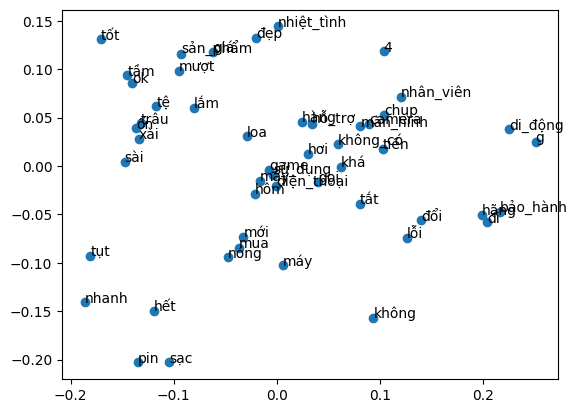

In [27]:
# save model
skipgram.save('skipgram.bin')
# load model
skipgram = Word2Vec.load('skipgram.bin')
# T -SNE plot í one of the way to evaluate word embedding
X = skipgram.wv[skipgram.wv.index_to_key]
X_subset = X[:50]
pca = PCA(n_components=2)
result = pca.fit_transform(X_subset)
pyplot.scatter(result[:,0], result[:,1])
words = list(skipgram.wv.index_to_key)

words_to_plot = words[:50]  # Plot only the first 100 words


for i, word in enumerate(words_to_plot):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Continuos Bag of Word ( CBOW )

In [28]:
# training the model
cbow = Word2Vec(sentences_comments,vector_size=50, window= 3, min_count=1, sg= 0)
print(cbow)

Word2Vec<vocab=3631, vector_size=50, alpha=0.025>


In [29]:
cbow.wv['hỏng']

array([ 0.00819136, -0.00070795, -0.00762363,  0.06379563, -0.02035653,
       -0.12801732,  0.08761033,  0.20569518, -0.18465476, -0.05593747,
        0.01274932, -0.18830335,  0.05479487,  0.11474907, -0.07522516,
        0.03670328,  0.08480742,  0.01738162, -0.150981  , -0.11088251,
        0.05480229,  0.05378148,  0.1881756 , -0.07505652,  0.05582711,
        0.0288214 , -0.04929203, -0.03192862, -0.13639174,  0.07728844,
        0.0078287 , -0.07684535,  0.00243295, -0.03938871, -0.06792034,
        0.09643141,  0.1255062 ,  0.03382725,  0.03780143, -0.08475118,
        0.12833035, -0.03418235, -0.02906459,  0.06798997,  0.18719104,
       -0.03647777, -0.01997491, -0.11823301,  0.06285471,  0.05754399],
      dtype=float32)

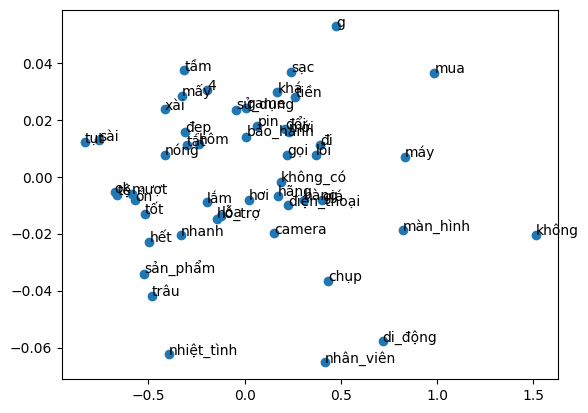

In [30]:
# save model
cbow.save('cbow.bin')
# load model
cbow = Word2Vec.load('cbow.bin')
# T-SNE plot - to evaluate word embedding
X = cbow.wv[cbow.wv.index_to_key]
X_subset = X[:50]

pca = PCA(n_components=2)
result = pca.fit_transform(X_subset)
pyplot.scatter(result[:,0], result[:,1])

words = list(cbow.wv.index_to_key)
words_to_plot = words[:50]

for i, word in enumerate(words_to_plot):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()